# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kondagaon
Processing Record 2 of Set 1 | catral
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | san pascual
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | ghat
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | ara nova
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | archangelos
Processing Record 16 of Set 1 | kayyerkan
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | sivas
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | ad dabbah
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kondagaon,19.6000,81.6667,22.51,94,100,2.25,IN,1723083145
1,catral,38.1580,-0.7969,27.34,61,0,1.79,ES,1723083146
2,saipan,15.1355,145.7010,32.39,70,40,3.60,MP,1723083147
3,san pascual,13.7975,121.0342,30.35,70,16,5.35,PH,1723083148
4,longyearbyen,78.2186,15.6401,10.91,93,75,0.00,SJ,1723083149


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kondagaon,19.6000,81.6667,22.51,94,100,2.25,IN,1723083145
1,catral,38.1580,-0.7969,27.34,61,0,1.79,ES,1723083146
2,saipan,15.1355,145.7010,32.39,70,40,3.60,MP,1723083147
3,san pascual,13.7975,121.0342,30.35,70,16,5.35,PH,1723083148
4,longyearbyen,78.2186,15.6401,10.91,93,75,0.00,SJ,1723083149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

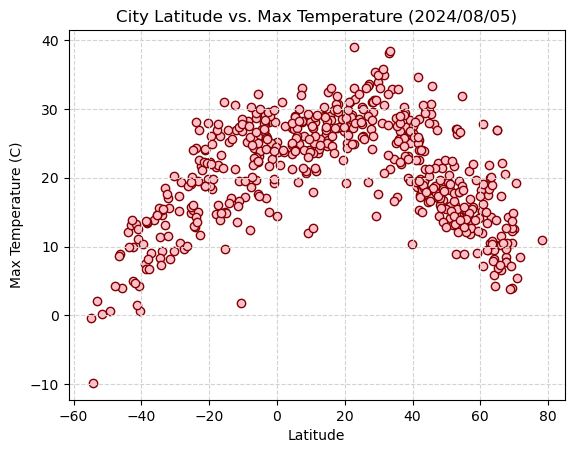

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="pink", linewidths=1, edgecolor="maroon", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

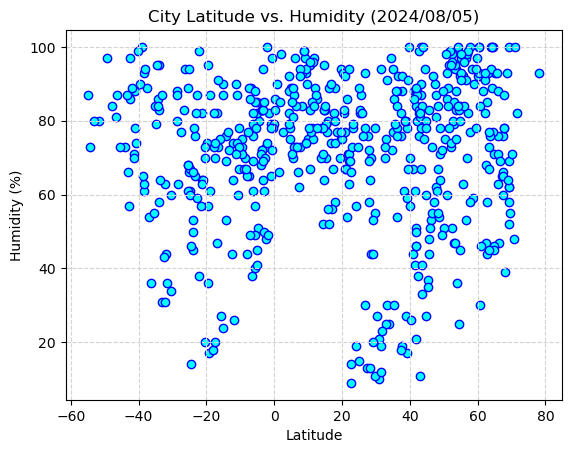

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="cyan", linewidths=1, edgecolor="blue", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

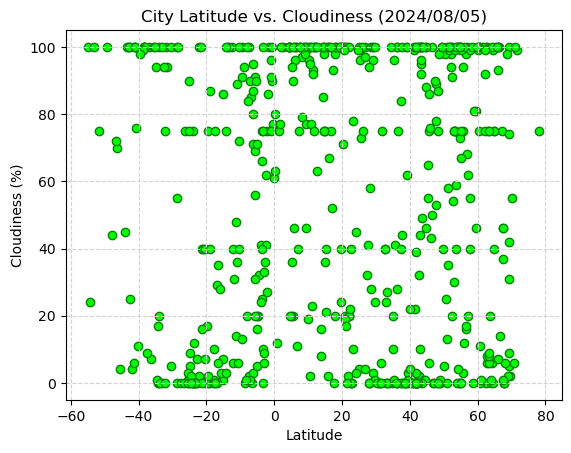

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="lime", linewidths=1, edgecolor="green", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

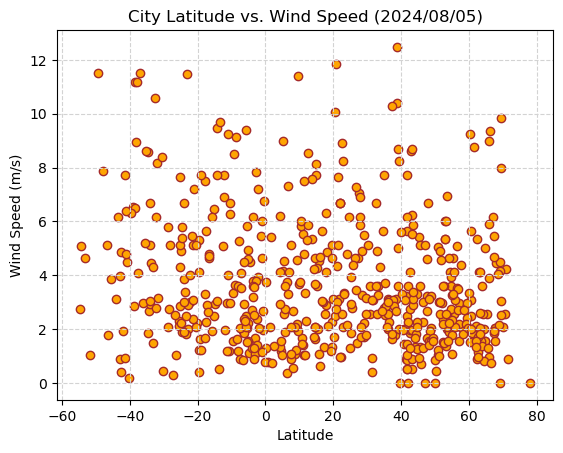

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="orange", linewidths=1, edgecolor="brown", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere):
    #regression line parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #scatter plot parameters
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, txt_location, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} {x_label} vs {y_label}")

    print(f"The R-squared value is {rvalue**2:.5f}")


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kondagaon,19.6000,81.6667,22.51,94,100,2.25,IN,1723083145
1,catral,38.1580,-0.7969,27.34,61,0,1.79,ES,1723083146
2,saipan,15.1355,145.7010,32.39,70,40,3.60,MP,1723083147
3,san pascual,13.7975,121.0342,30.35,70,16,5.35,PH,1723083148
4,longyearbyen,78.2186,15.6401,10.91,93,75,0.00,SJ,1723083149


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
9,chonchi,-42.6128,-73.8092,5.07,97,25,0.41,CL,1723083155
11,waitangi,-43.9535,-176.5597,12.12,73,45,3.13,NZ,1723083157
17,ushuaia,-54.8000,-68.3000,-0.33,87,100,2.76,AR,1723083164
19,edinburgh of the seven seas,-37.0676,-12.3116,9.11,54,100,11.51,SH,1723083166
21,port-aux-francais,-49.3500,70.2167,0.60,97,100,11.51,TF,1723083169


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is 0.44974


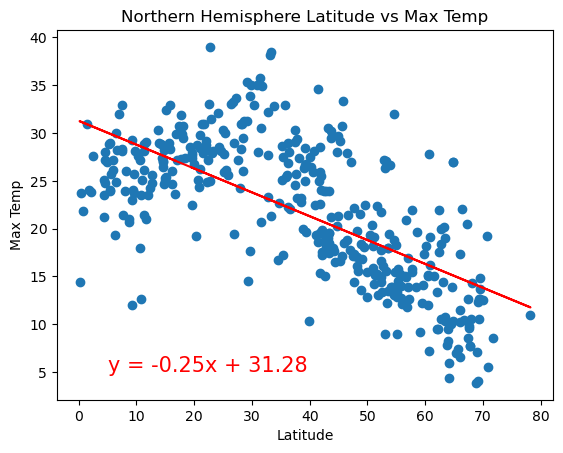

In [37]:
# Linear regression on Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
txt_location = (5, 5)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)


The R-squared value is 0.61448


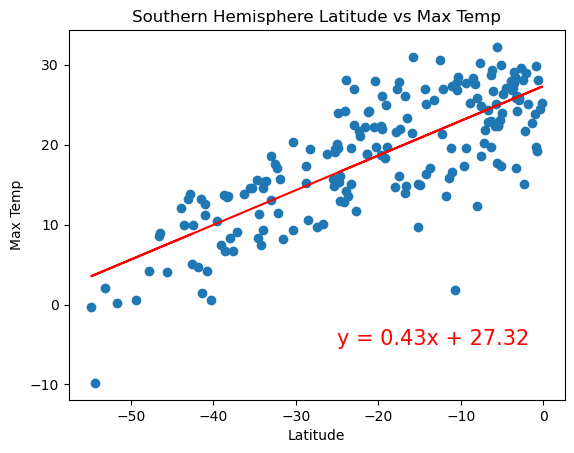

In [38]:
# Linear regression on Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
txt_location = (-25, -5)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** 

The northern hemisphere displays a negative correlation as latitude increases from 0 to 50 degrees, the temperature decreases.  The southern hemisphere shows a positive correlation as latitude increases from -50 to 0 degress, temperature increases.  This is known to be true as we more closer to the equator at 0deg, the temperatures are warmer.  The Rsquared values are 0.45 and 0.61 respectively which indicates that this is relatively true for most of our data since they are close to each other.


### Humidity vs. Latitude Linear Regression Plot

The R-squared value is 0.00043


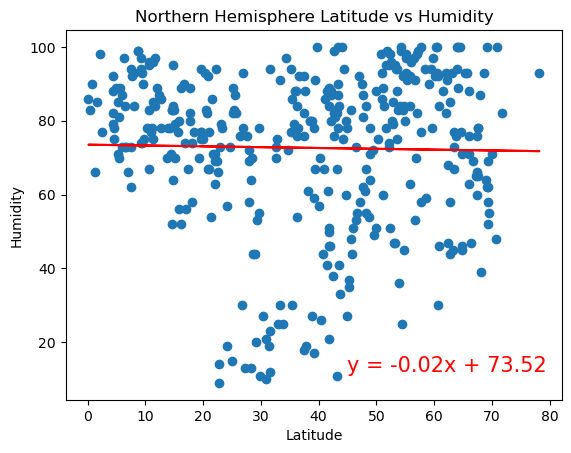

In [22]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
txt_location = (45, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.01237


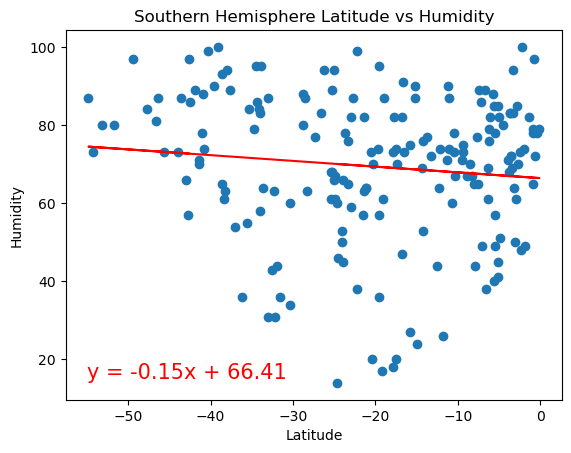

In [23]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
txt_location = (-55, 15)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** 

There is no direct correlation between humidity and latitude.  Both the northern and southern hemisphere has similar humidity as we increase in latitude(or move closer to the equator).  They have a RSquared value of 0.0004 and 0.01 respectively which are both quite small.  This indicated the data is spread out, further strengthening the finding that humidity is not affected by latitude. The norhern hemisphere has appears to be more dense, but this may be to us randomly selecting more cities in the northern hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared value is 0.02055


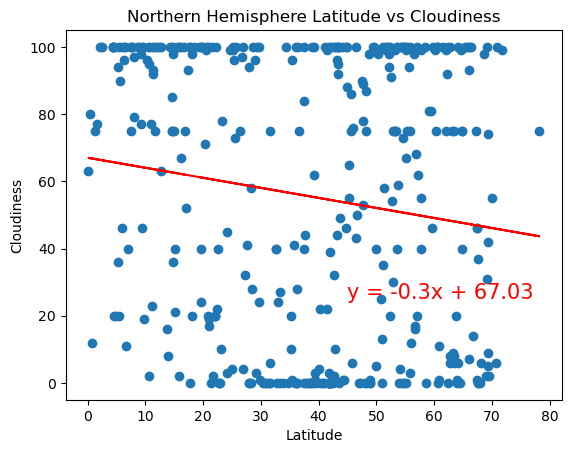

In [35]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
txt_location = (45, 25)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.00818


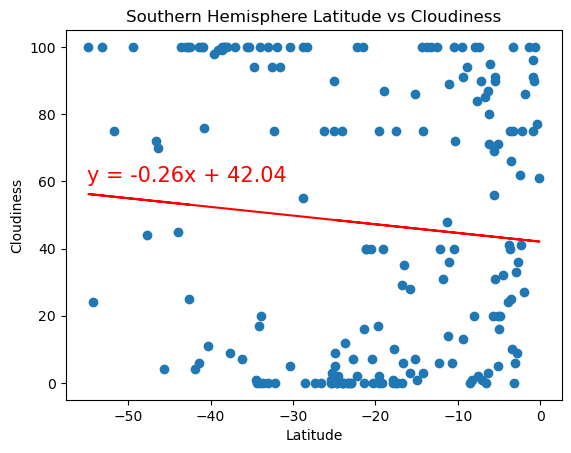

In [40]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
txt_location = (-55, 60)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** 

The data is right skewed as we move closer to the equator(0deg latitude), we see more clouds for the southern hemisphere.  This may be because the data was taken in August, the southern hemisphere maybe experiencing winter at -50deg latitude, and rainy season at 0deg latitude.  The Northern hemisphere appears to not have a direct correlation between cloudiness and latitude.  They have a RSquared value of 0.021 and 0.0082 respectively which are both quite small.  This proves there is not a strong correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared value is 0.01070


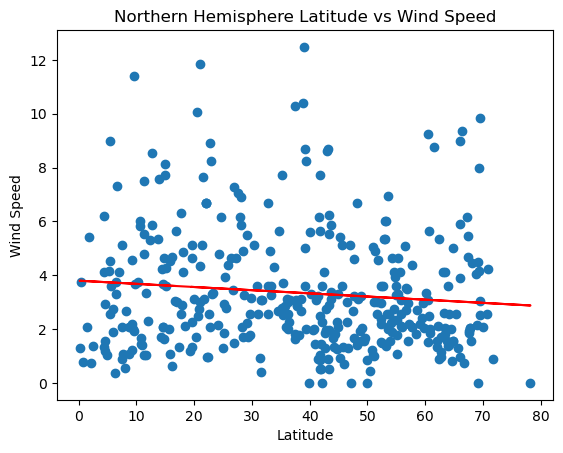

In [42]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
txt_location = (-20, 11)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.03653


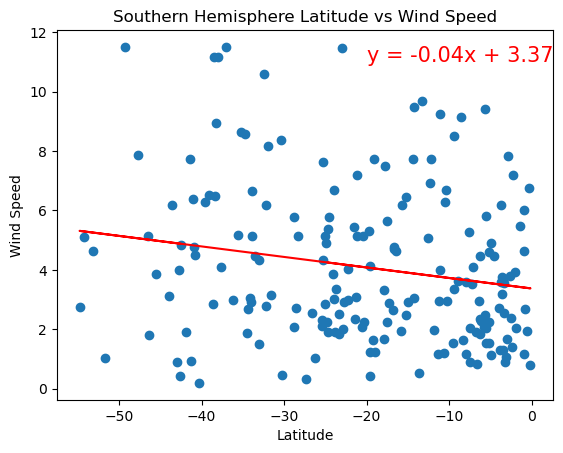

In [43]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
txt_location = (-20, 11)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** 

Wind speeds are mostly below 6 m/s in the northern hemisphere as we move closer to the equator.  This differs in the southern hemisphere as wind speed range from 0 to 12 m/s.  There is not a direct correlation between wind speeds and latitude.